In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from keras.models import Sequential
from keras.layers import Dense
from keras.models import clone_model
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.regularizers import l2


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.decomposition import PCA

In [4]:
df_og = pd.read_csv("StrongPasswordData.csv")

# shows the shape of dataset
print(f'\033[1m{"-----DATAFRAME-SHAPE-----"}\033[0m \n      {df_og.shape} \n')

# shows the deatures type
print(f'\033[1m{"-----FEATURES-TYPE-----"}\033[0m \n{df_og.dtypes}')

df_og

-----DATAFRAME-SHAPE----- 
      (20400, 34) 

-----FEATURES-TYPE----- 
subject             object
sessionIndex         int64
rep                  int64
H.period           float64
DD.period.t        float64
UD.period.t        float64
H.t                float64
DD.t.i             float64
UD.t.i             float64
H.i                float64
DD.i.e             float64
UD.i.e             float64
H.e                float64
DD.e.five          float64
UD.e.five          float64
H.five             float64
DD.five.Shift.r    float64
UD.five.Shift.r    float64
H.Shift.r          float64
DD.Shift.r.o       float64
UD.Shift.r.o       float64
H.o                float64
DD.o.a             float64
UD.o.a             float64
H.a                float64
DD.a.n             float64
UD.a.n             float64
H.n                float64
DD.n.l             float64
UD.n.l             float64
H.l                float64
DD.l.Return        float64
UD.l.Return        float64
H.Return           float64
dtype: obj

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,s057,8,46,0.0884,0.0685,-0.0199,0.1095,0.1290,0.0195,0.0945,...,0.1219,0.1383,0.0164,0.0820,0.1329,0.0509,0.1005,0.2054,0.1049,0.1047
20396,s057,8,47,0.0655,0.0630,-0.0025,0.0910,0.1148,0.0238,0.0916,...,0.1008,0.0512,-0.0496,0.1037,0.0868,-0.0169,0.1445,0.2206,0.0761,0.1198
20397,s057,8,48,0.0939,0.1189,0.0250,0.1008,0.1122,0.0114,0.0721,...,0.0913,0.1169,0.0256,0.0689,0.1311,0.0622,0.1034,0.2017,0.0983,0.0905
20398,s057,8,49,0.0923,0.1294,0.0371,0.0913,0.0990,0.0077,0.0992,...,0.0882,0.0821,-0.0061,0.0576,0.0697,0.0121,0.0979,0.1917,0.0938,0.0931


In [5]:
value_counts = df_og['subject'].value_counts()
desired_value = 's002'

if desired_value in value_counts:
    print(f"Number of lines with '{desired_value}': {value_counts[desired_value]}")
else:
    print(f"'{desired_value}' not found in the 'subject' feature.")


Number of lines with 's002': 400


In [6]:
# Change the subjects values from string to numeric values
# Use regular expressions to extract numbers
df_og['subject'] = df_og['subject'].str.extract('(\d+)')

# Convert the extracted numbers to integers
df_og['subject'] = pd.to_numeric(df_og['subject'])


The dataset represent a collection keystroke data. During eight different session, 51 people where asked to type the same password (.tie5Roanl)50 times.
Thus we have for each subject, 400 rows of data, and a total of 20400 rows in the dataset.

The features we will use for the study are all of type float and represent statistical data from the keystroke dynamics. Basically, the features are made of three main componants the hold time (H), keydown-keydown time (DD) and keyup-keydown time (UD).

We will start the study by making graphical representations of the data and some preprocessing if necessary. Then we will train different model and assess their accuracy to predict the good class.

The purpose of this study is to see if keystroke data can be used to detect undesired people trying to login into a system they are not authorized to use.

In [7]:
H_col  = [i for i in df_og.columns if i.startswith('H')]
DD_col = [i for i in df_og.columns if i.startswith('DD')]
UD_col = [i for i in df_og.columns if i.startswith('UD')]

data = dict()

# Make specific dataframe for each main features
data['H']     = df_og[H_col]
data['DD']    = df_og[DD_col]
data['UD']    = df_og[UD_col]

# Make a dataset with all data without the unwanted columns
data['fullset'] = df_og.drop(columns=['subject', 'sessionIndex', 'rep'])

# Make different datasets using principal components 
data['pca2']  = pd.DataFrame(PCA(n_components=2).fit_transform(data['fullset'])) # 2 components allow us to plot the clustering
data['pca15'] = pd.DataFrame(PCA(n_components=15).fit_transform(data['fullset']))

Y_dl = pd.get_dummies(df_og['subject'].values).values # convert the subject value to an array of binary values for DL multiclass classification
Y = df_og['subject'].values # get the array of the subject values


Let's vizualize the data

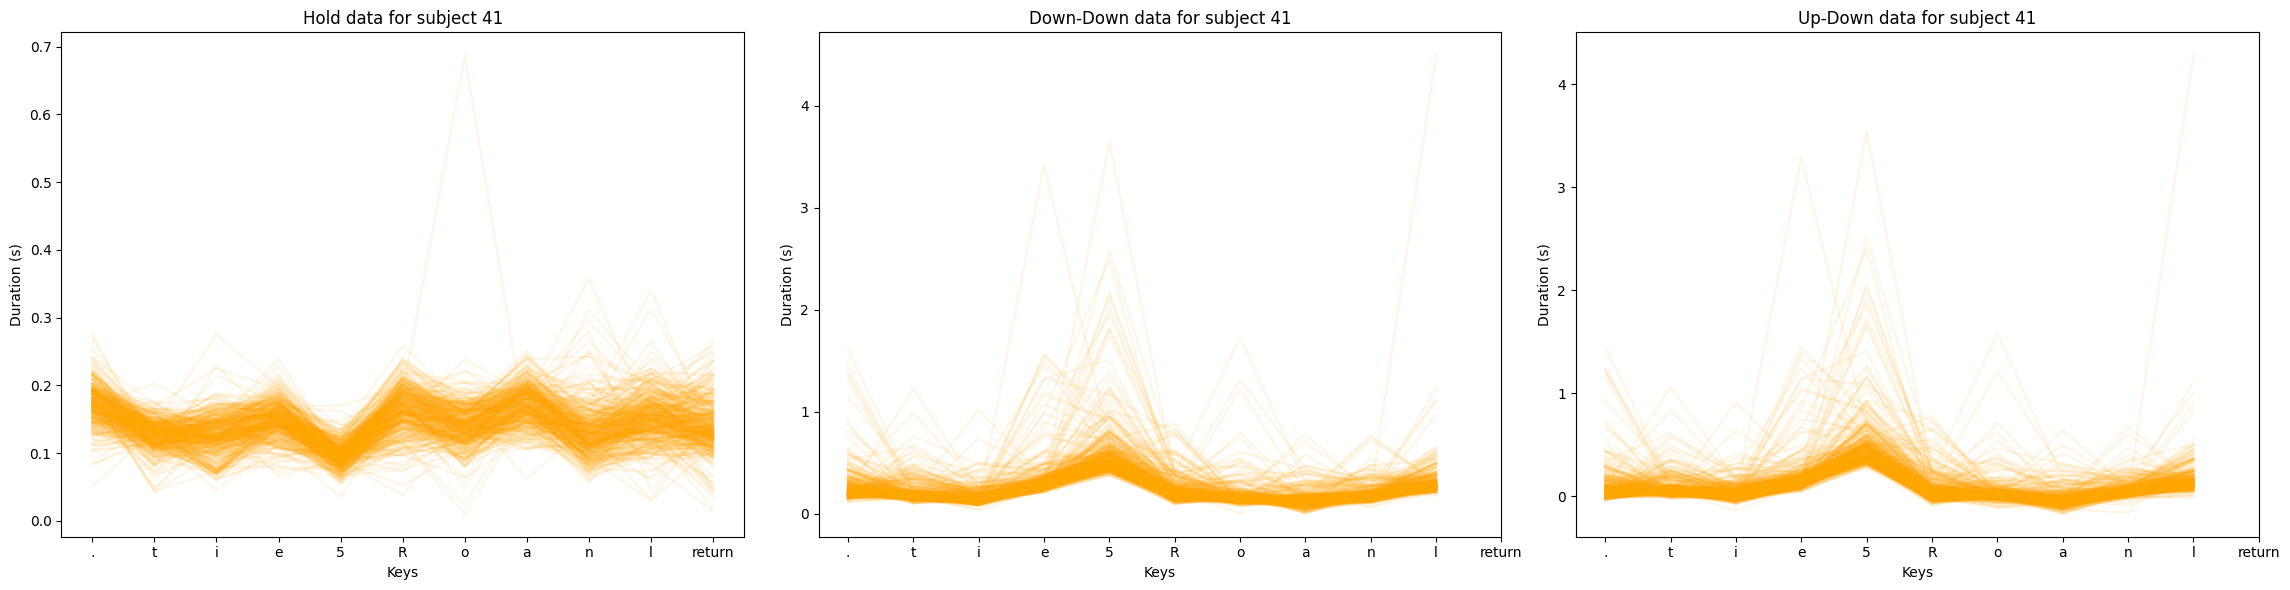

In [8]:
df_1 = data['H'].copy()
df_2 = data['DD'].copy()
df_3 = data['UD'].copy()

data_frame_list = [df_1, df_2, df_3]

def show_data(data_frame_list, Y):

    feature = ['Hold', 'Down-Down', 'Up-Down']
    keys = ['.', 't', 'i', 'e', '5', 'R', 'o', 'a', 'n', 'l', 'return'] # the keys typed for the x ticks label
    subject = np.random.choice(Y)

    plt.figure(figsize=(23, 6))
    for i, df_ in enumerate(data_frame_list):
        plt.subplot(1,3,i+1)
        for x in df_[Y == subject].values:
            plt.plot(x, color='orange', alpha=0.1)
        plt.title(f'{feature[i]} data for subject {subject}')
        plt.xlabel('Keys')
        plt.ylabel('Duration (s)')
        plt.xticks(np.arange(len(keys)), keys)
    plt.tight_layout()

show_data(data_frame_list, Y)


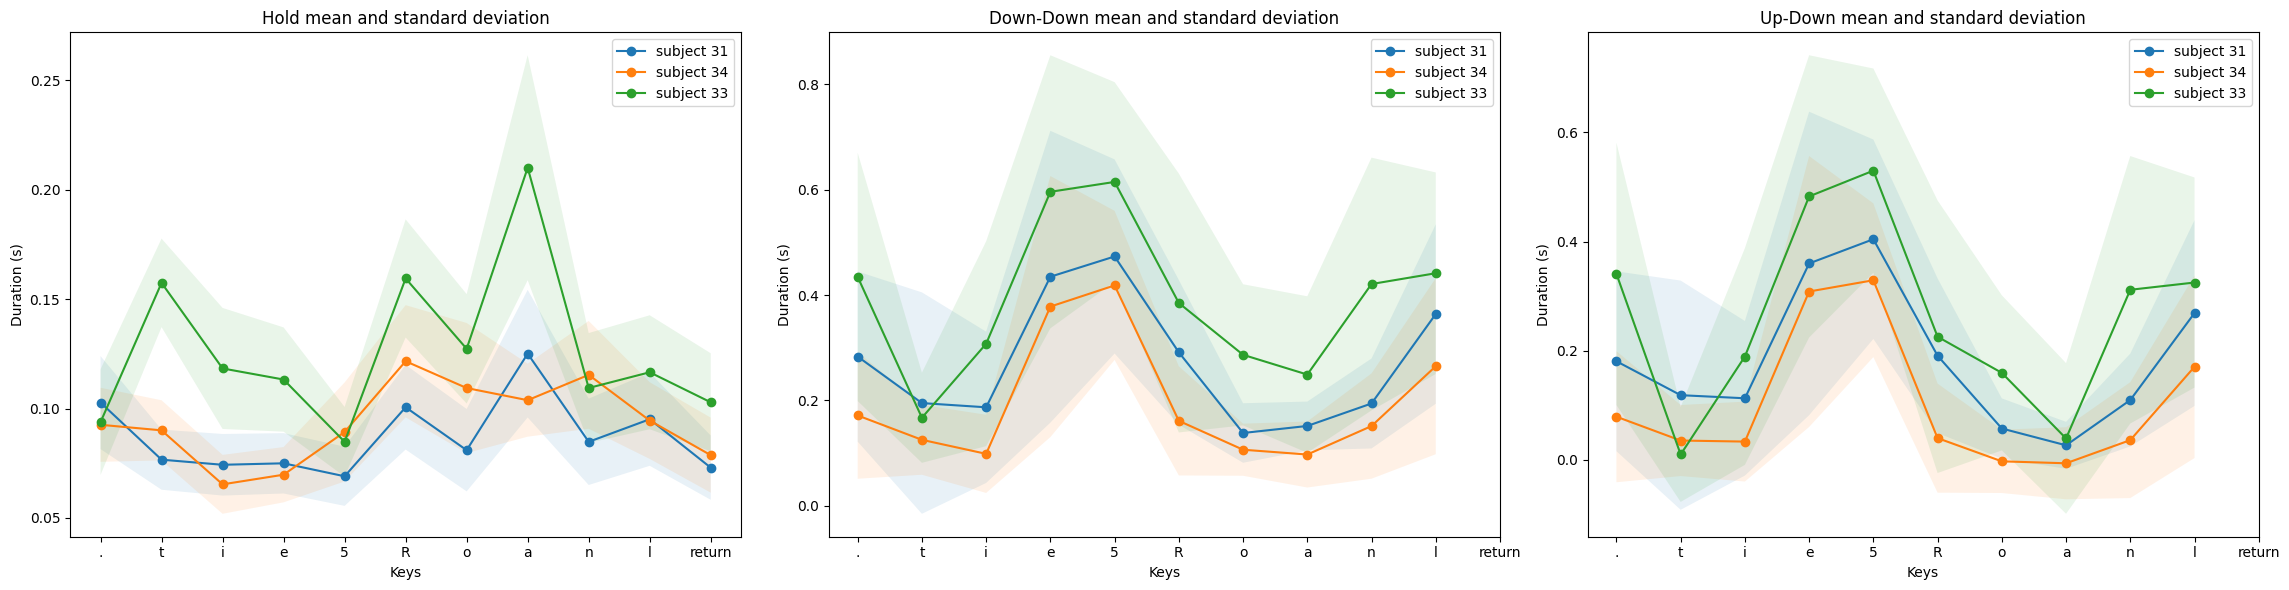

In [9]:
df_1 = data['H'].copy()
df_2 = data['DD'].copy()
df_3 = data['UD'].copy()

data_frame_list = [df_1, df_2, df_3]


def show_mean_std(data_frame_list, Y, number_y=1):
    feature = ['Hold', 'Down-Down', 'Up-Down']
    keys = ['.', 't', 'i', 'e', '5', 'R', 'o', 'a', 'n', 'l', 'return'] # the keys typed for the x ticks label
    classes = np.random.choice(np.unique(Y), size=number_y, replace=False)


    plt.figure(figsize=(23, 6))
    for i, df_ in enumerate(data_frame_list):
        plt.subplot(1,3,i+1)

        for y in classes:

            # Group by subject and calculate mean and std
            grouped_data = df_.groupby(Y)
            mean_values = grouped_data.mean().loc[y]
            std_values = grouped_data.std().loc[y]

            plt.plot(np.arange(len(mean_values)), mean_values, 'o-', label=f'subject {y}')
            plt.fill_between(np.arange(len(mean_values)), mean_values - std_values, mean_values + std_values, alpha=0.1)

        plt.title(f'{feature[i]} mean and standard deviation')
        plt.xlabel('Keys')
        plt.ylabel('Duration (s)')
        plt.legend()
        plt.xticks(np.arange(len(keys)), keys)
    plt.tight_layout()
    plt.show()

show_mean_std(data_frame_list,Y, 3)

In [10]:
from sklearn.manifold import TSNE

classes = np.random.choice(np.unique(Y), size=20, replace=False)

mask = [y0 in classes for y0 in Y]

X_tsne = data['fullset'].values[mask]
y_subset = Y[mask]

tsne = TSNE(n_components=2, learning_rate=1000, perplexity=8)
X_embedded = tsne.fit_transform(X_tsne)

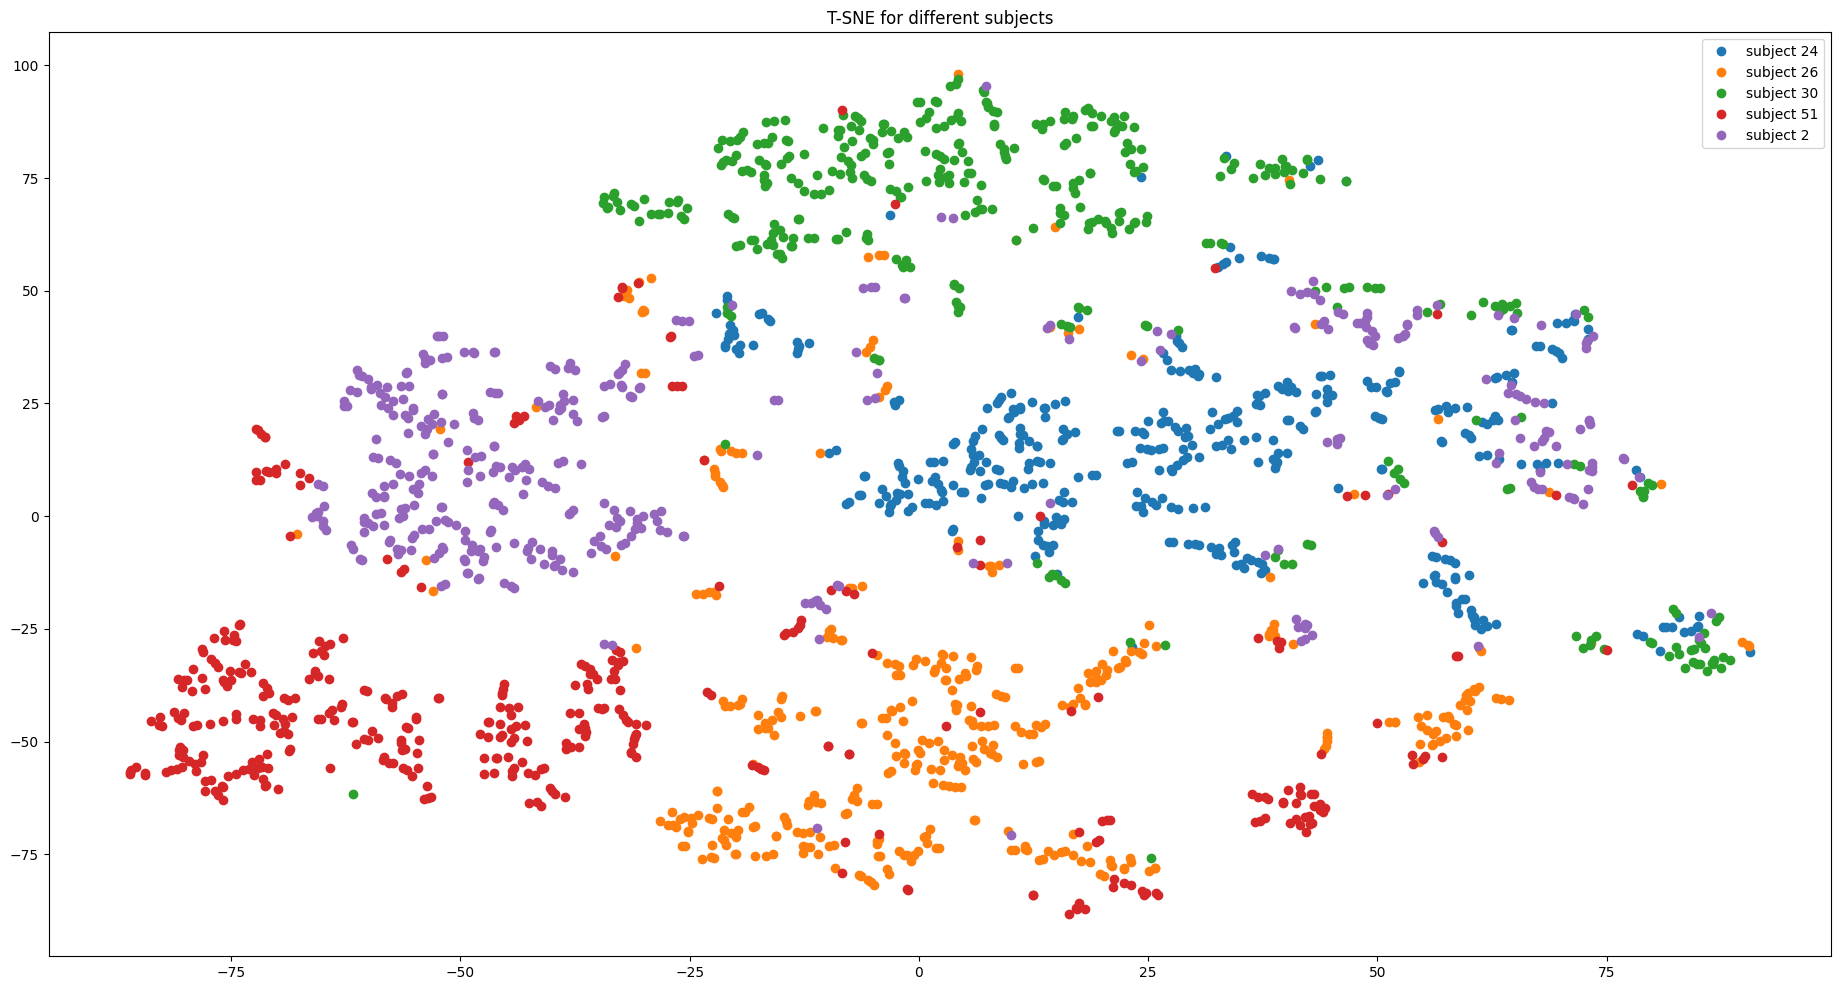

In [11]:
plt.figure(figsize=(23, 12))
for y0 in classes:
    label = f'subject {y0}'
    plt.plot(X_embedded[y_subset == y0][:, 0], X_embedded[y_subset == y0][:, 1],'o', label=label)

plt.title('T-SNE for different subjects')
plt.legend()

# Classification 

## Clustering

Silhouette Score: 0.06730327011655533


Text(0.5, 1.0, 'Data from PCA')

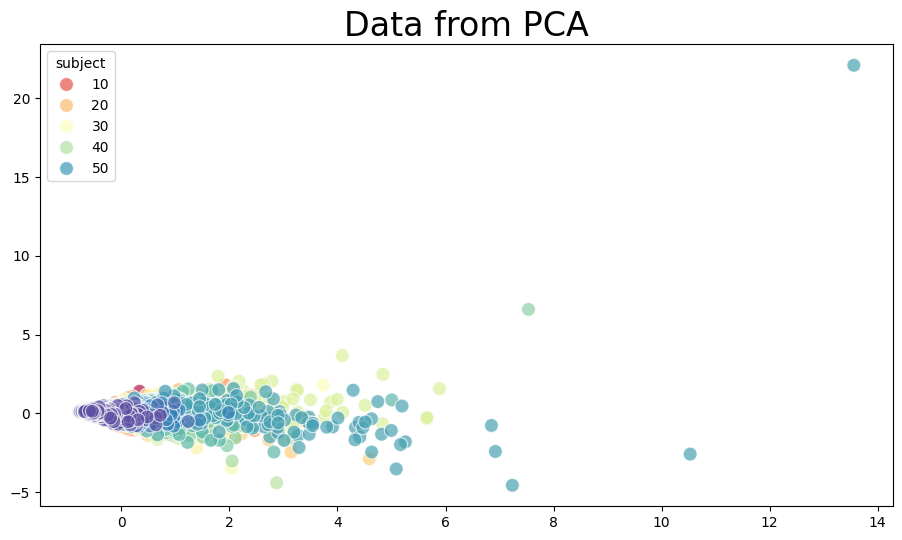

In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler



X = data['fullset'].copy().values

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Specify the number of clusters (you may need to choose an appropriate value)
num_clusters = 51

# Perform hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
labels = agg_clustering.fit_predict(X_standardized)

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_standardized, labels)
print(f"Silhouette Score: {silhouette_avg}")

plt.figure(figsize=(11,6))
g1 = sns.scatterplot(x=data['pca2'][0].values, y=data['pca2'][1].values, s=100, hue=df_og['subject'], palette='Spectral', alpha=0.7)
plt.title('Data from PCA')


## KNN

Accuracy: 0.7340686274509803


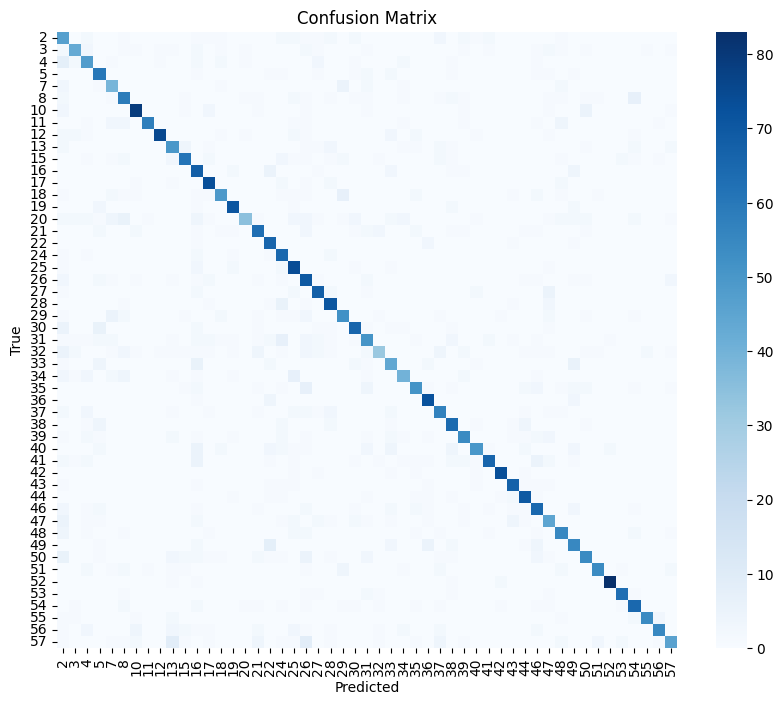

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


X = data['fullset'].copy().values


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Create a KNeighborsClassifier model
knn_clf = KNeighborsClassifier(n_neighbors=10)  
# Train the model
knn_clf.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = knn_clf.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=False, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## SVM

Accuracy: 0.6583333333333333


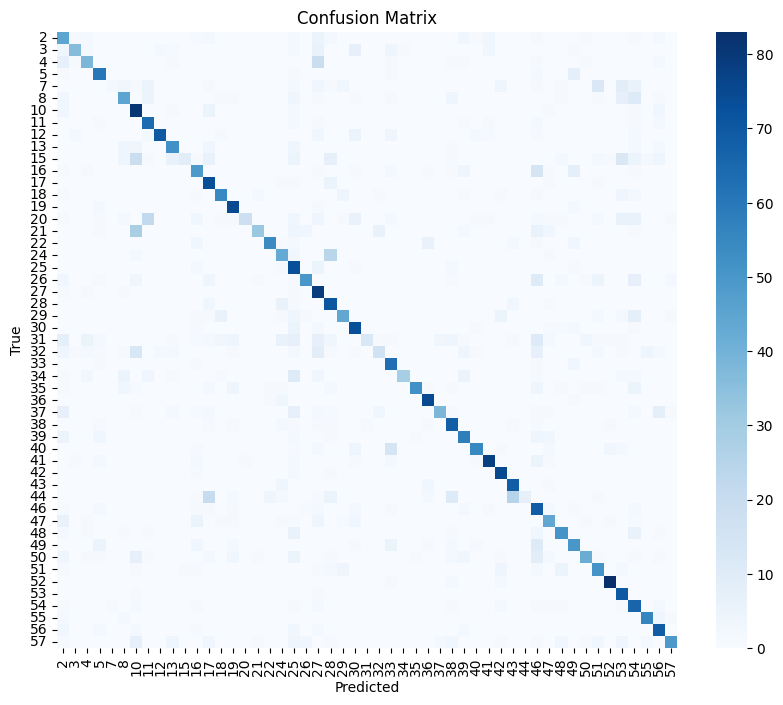

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


X = data['fullset'].copy().values


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Create an SGDClassifier model with linear SVM loss
sgd_clf = SGDClassifier(loss='log_loss', max_iter=1000, learning_rate='optimal', eta0=0.1)

# Train the model
sgd_clf.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = sgd_clf.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=False, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## LogReg

Accuracy: 0.7321078431372549


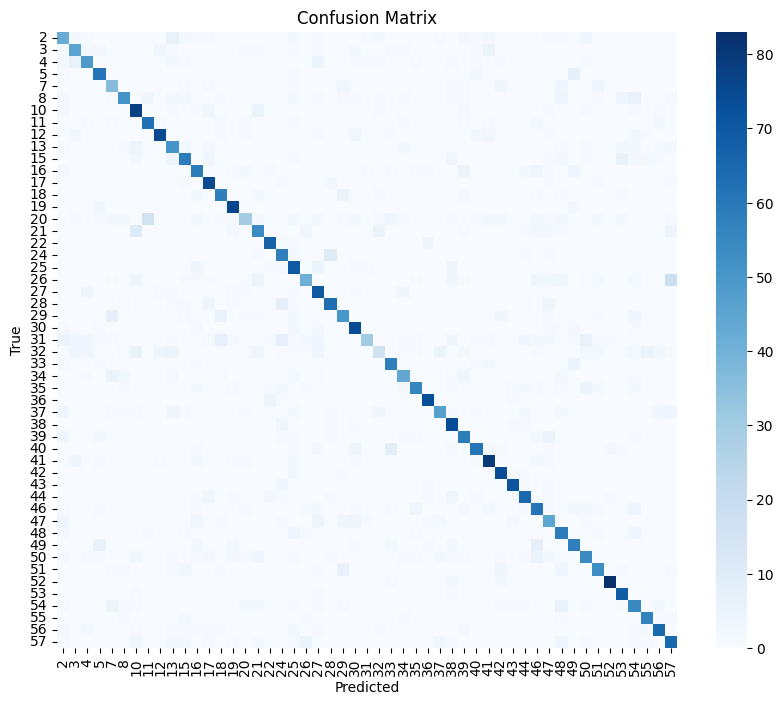

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
from sklearn.exceptions import ConvergenceWarning


# warnings.filterwarnings("ignore", category=ConvergenceWarning)


X = data['fullset'].copy().values


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Create a Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)

# Train the model
logreg.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = logreg.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=False, fmt='d', cmap='Blues', xticklabels=[i for i in np.unique(Y)], yticklabels=[i for i in np.unique(Y)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Deep Learning Algorithm

## MLP

In [65]:
def create_model(learning_rate=0.0005, dropout_rate=0.1):
    model = keras.Sequential()
    
    model.add(layers.Input(shape=(31,)))
    model.add(layers.Dense(75, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(150, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(150, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(300, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(300, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(300, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))


    model.add(layers.Dense(150, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))


    model.add(layers.Dense(150, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(51, activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [67]:
from sklearn.model_selection import train_test_split

Y_dl = Y_dl.astype(float)

X_train, X_temp, y_train, y_temp = train_test_split(X, Y_dl, test_size=0.2, random_state=42, stratify=Y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [69]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model = create_model()

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=400, batch_size=8)#, callbacks=[early_stopping])

Epoch 1/400
2040/2040 [==============================] - 19s 7ms/step - loss: 3.5694 - accuracy: 0.1149 - val_loss: 2.7280 - val_accuracy: 0.3471
Epoch 2/400
2040/2040 [==============================] - 12s 6ms/step - loss: 2.8712 - accuracy: 0.2379 - val_loss: 2.1816 - val_accuracy: 0.4431
Epoch 3/400
2040/2040 [==============================] - 12s 6ms/step - loss: 2.5574 - accuracy: 0.3053 - val_loss: 1.8898 - val_accuracy: 0.5299
Epoch 4/400
2040/2040 [==============================] - 12s 6ms/step - loss: 2.3570 - accuracy: 0.3617 - val_loss: 1.6351 - val_accuracy: 0.6088
Epoch 5/400
2040/2040 [==============================] - 12s 6ms/step - loss: 2.1784 - accuracy: 0.4087 - val_loss: 1.3688 - val_accuracy: 0.6691
Epoch 6/400
2040/2040 [==============================] - 16s 8ms/step - loss: 2.0096 - accuracy: 0.4520 - val_loss: 1.2379 - val_accuracy: 0.6975
Epoch 7/400
2040/2040 [==============================] - 39s 19ms/step - loss: 1.8905 - accuracy: 0.4812 - val_loss: 1.1322 

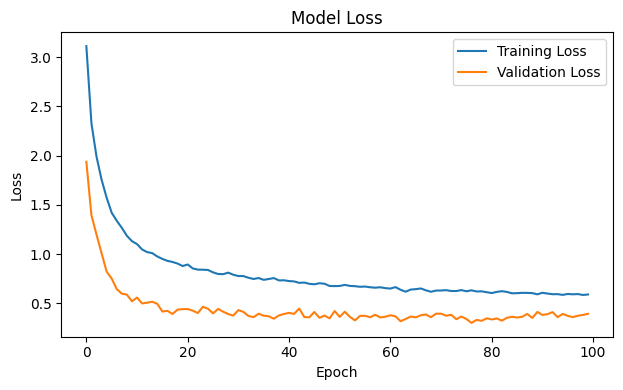

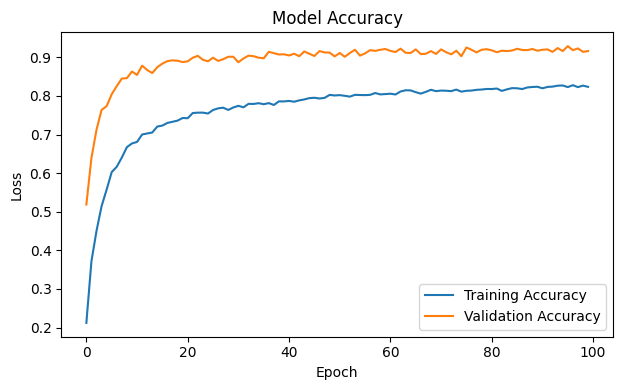

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.savefig("MLP_project_11.png")
plt.show()

import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.savefig("MLP_project_11.png")
plt.show()


## Statistical approach from the study
© .....


In [ ]:
import pandas as pd
import numpy as np
from scipy.linalg import pinv
from sklearn.metrics import roc_curve, auc

# Anomaly Detectors
def euclidean_train(Y_train):
    return {"mean": np.mean(Y_train, axis=0)}

def euclidean_score(dmod, Y_score):
    mean_matrix = np.tile(dmod["mean"], (len(Y_score), 1))
    scores = np.sum((Y_score - mean_matrix)**2, axis=1)
    return scores

def manhattan_train(Y_train):
    return {"mean": np.mean(Y_train, axis=0)}

def manhattan_score(dmod, Y_score):
    mean_matrix = np.tile(dmod["mean"], (len(Y_score), 1))
    scores = np.sum(np.abs(Y_score - mean_matrix), axis=1)
    return scores

def mahalanobis_train(Y_train):
    cov_inv = pinv(np.cov(Y_train, rowvar=False))
    return {"mean": np.mean(Y_train, axis=0), "covInv": cov_inv}

def mahalanobis_score(dmod, Y_score):
    scores = np.sum((Y_score - dmod["mean"]).dot(dmod["covInv"]) * (Y_score - dmod["mean"]), axis=1)
    return scores

detector_set = {
    "Euclidean": {"train": euclidean_train, "score": euclidean_score},
    "Manhattan": {"train": manhattan_train, "score": manhattan_score},
    "Mahalanobis": {"train": mahalanobis_train, "score": mahalanobis_score}
}

# Evaluation Procedures
def calculate_equal_error(user_scores, impostor_scores):
    all_scores = np.concatenate([user_scores, impostor_scores])
    labels = np.concatenate([np.zeros_like(user_scores), np.ones_like(impostor_scores)])

    fpr, tpr, _ = roc_curve(labels, -all_scores)
    eer_index = np.argmin(np.abs(tpr - (1 - fpr)))
    eer = (tpr[eer_index] + fpr[eer_index]) / 2

    return eer

def evaluate_subject(X, eval_subject, detector_train, detector_score):
    Y_train = X[(X["subject"] == eval_subject) & (X["sessionIndex"] <= 4)].iloc[:, 3:].values
    Y_score_user = X[(X["subject"] == eval_subject) & (X["sessionIndex"] > 4)].iloc[:, 3:].values
    Y_score_impostor = X[(X["subject"] != eval_subject) & (X["sessionIndex"] == 1) & (X["rep"] <= 5)].iloc[:, 3:].values

    dmod = detector_train(Y_train)
    user_scores = detector_score(dmod, Y_score_user)
    impostor_scores = detector_score(dmod, Y_score_impostor)

    eer = calculate_equal_error(user_scores, impostor_scores)

    return eer

# Main Procedure
print("Loading the data file")
datafile = 'StrongPasswordData.csv'
if not pd.io.common.file_exists(datafile):
    raise FileNotFoundError(f"Password data file {datafile} does not exist")

# Retrieve the data and the list of subjects
X = pd.read_csv(datafile)
subjects = sorted(X["subject"].unique())

# For each of the detectors, evaluate the detector on each subject
# and record the equal-error rates in a data frame.
eers = {}

for detector_name, detector_funcs in detector_set.items():
    print(f"Evaluating the {detector_name} detector")
    detector_train = detector_funcs["train"]
    detector_score = detector_funcs["score"]

    eers[detector_name] = np.full(len(subjects), np.nan)

    for i, subject in enumerate(subjects):
        eer = evaluate_subject(X, subject, detector_train, detector_score)
        eers[detector_name][i] = eer
        print(f"\r  {i + 1}/{len(subjects)}: {eer:.6f}", end="")
    
    print(f"\r  average equal-error: {np.nanmean(eers[detector_name]):.6f}\n")

print("Tabulating results:")
eers_df = pd.DataFrame(eers, index=subjects)
result_df = pd.DataFrame({"eer.mean": eers_df.mean(), "eer.sd": eers_df.std()})
print(result_df.round(3))


Loading the data file
Evaluating the Euclidean detector
  average equal-error: 0.500108

Evaluating the Manhattan detector
  average equal-error: 0.500363

Evaluating the Mahalanobis detector
  average equal-error: 0.500049

Tabulating results:
             eer.mean  eer.sd
Euclidean         0.5   0.003
Manhattan         0.5   0.003
Mahalanobis       0.5   0.005
